creat trajectory dataset, torque dataset for the robotic manipulation task

In [ ]:
import os.path
import sys
import numpy as np 
import matplotlib.pyplot as plt
import torch

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from utils.data_loader import ManipulationLoader, ManipulationTorqueLoader
from models.dmp import CanonicalSystem, SingleDMP

load all the data in /data/manipulation

In [ ]:
cs =CanonicalSystem(dt=0.01, ax=1)
dmp = SingleDMP(n_bfs=50, cs=cs, run_time=1.0, dt=0.01)
traj_loader = ManipulationLoader(run_time=1.0, dmp=dmp, dt=0.01, dof=5)
traj_loader.load_data_all("../data/manipulation_data/")

In [ ]:
# show one path
inter, label = traj_loader.paths[1]
print("task lable:", label)

# plot 3 interpolation trajectory
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
# print the length of the position
print("lenght of trajectory:",len(inter))
ax.scatter(inter[:,0], inter[:,1], inter[:,2])
# draw start and end point
ax.scatter(inter[0][0], inter[0][1], inter[0][2], c='y', marker='o')
ax.scatter(inter[-1][0], inter[-1][1], inter[-1][2], c='r', marker='o')

# Customize labels with font size
ax.set_xlabel('X axis (m)', fontsize=14, labelpad=10)
ax.set_ylabel('Y axis (m)', fontsize=14, labelpad=10)
ax.set_zlabel('Z axis (m)', fontsize=14, labelpad=10)

# Optionally, set tick parameters to adjust tick labels' font size
x_ticks = np.arange(0.6852, 0.6862, 0.0002)
plt.xticks(x_ticks)
ax.tick_params(axis='x', labelsize=12)  # Set font size for x-axis ticks
ax.tick_params(axis='y', labelsize=12)  # Set font size for y-axis ticks
ax.tick_params(axis='z', labelsize=12)  # Set font size for z-axis ticks

# Customize labels with font size
ax.set_xlabel('X axis (m)', fontsize=14, labelpad=10)
ax.set_ylabel('Y axis (m)', fontsize=14, labelpad=10)
ax.set_zlabel('Z axis (m)', fontsize=14, labelpad=10)

ax.text(*inter[0][:3], 'Start', color='black', fontsize=14)
ax.text(*inter[-1][:3], 'End', color='black', fontsize=14)


ax.set_box_aspect(aspect=None, zoom=0.86)

plt.show()

In [ ]:
# data augeumentation
traj_loader.data_augment(number=10000, weight_random=0.3)
# save the data
traj_loader.save_data("../data/manipulation_data/train_paths")
# test load
traj_loader.load_data("../data/manipulation_data/train_paths.npz") 
print(len(traj_loader))

30000


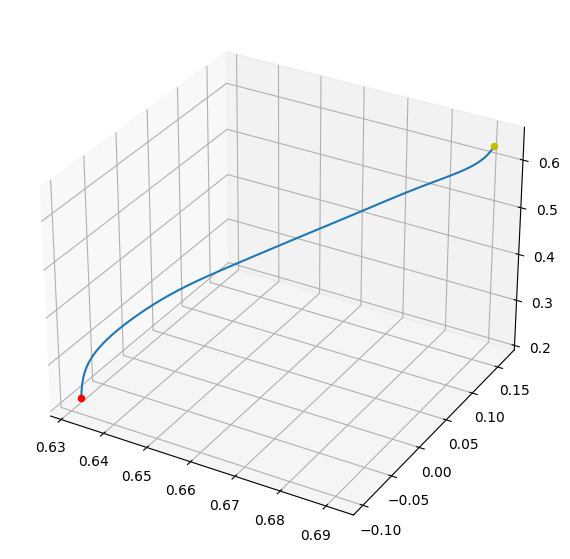

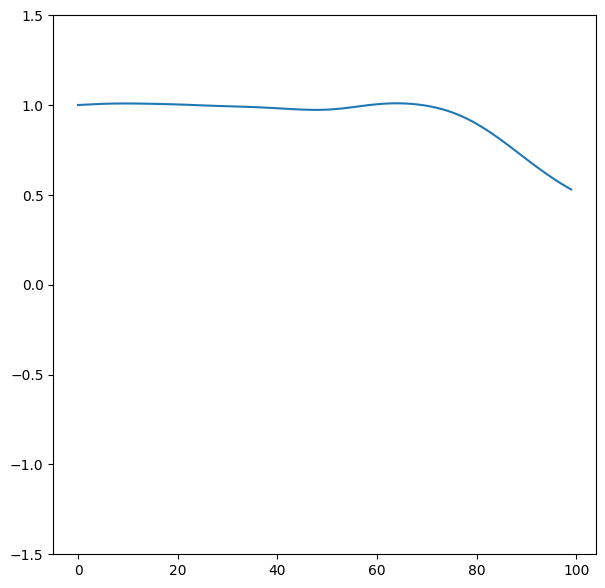

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

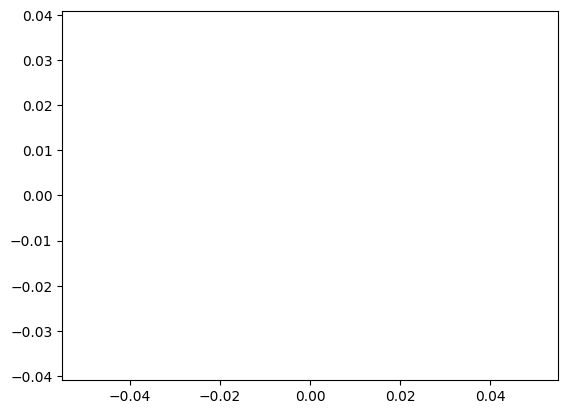

In [20]:
# plot the data after data augmentation
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
print(len(traj_loader))
# load all the data in the loader

fig2 = plt.figure(figsize=(7, 7))
# add a 2d plot
ax2 = fig2.add_subplot(111)
num_traj = 0
for i in range(len(traj_loader)):
    inter, label = traj_loader.paths[i], traj_loader.labels[i]
    if label[0] == 3:
        ax.plot(inter[:,0], inter[:,1], inter[:,2])
        num_traj += 1

        # draw start and end point
        ax.scatter(inter[0][0], inter[0][1], inter[0][2], c='y', marker='o')
        ax.scatter(inter[-1][0], inter[-1][1], inter[-1][2], c='r', marker='o')   

        # plot the 2d plot about the gripper state
        ax2.plot(inter[:,4]) 
        # set scale in y axis
        ax2.set_ylim(-1.5, 1.5)
        plt.show()

    if num_traj == 10:
    #     # draw start and end point
    #     ax.text(*inter[0][:3], 'Start', color='black', fontsize=14)
    #     ax.text(*inter[-1][:3], 'End', color='black', fontsize=14)
        break

# Customize labels with font size
ax.set_xlabel('X axis (m)', fontsize=14, labelpad=10)
ax.set_ylabel('Y axis (m)', fontsize=14, labelpad=10)
ax.set_zlabel('Z axis (m)', fontsize=14, labelpad=10)

ax.set_box_aspect(aspect=None, zoom=0.86)
    
plt.axis("equal")


Create torque dataset for the robotic manipulation task

In [ ]:
torque_loader = ManipulationTorqueLoader(dmp=dmp, run_time=1.0, dt=0.01, dof=5)
torque_loader.load_data_all("../data/manipulation_data/")
torque_loader.data_augment(number=10000, weight_random=0.3)

In [ ]:
# generate the torque dataset   
torque_loader.gen_torque_dataset()
torque_loader.save_data("../data/manipulation_data/train_torque")
# load the torque dataset
torque_loader.load_data("../data/manipulation_data/train_torque.npz")

30000


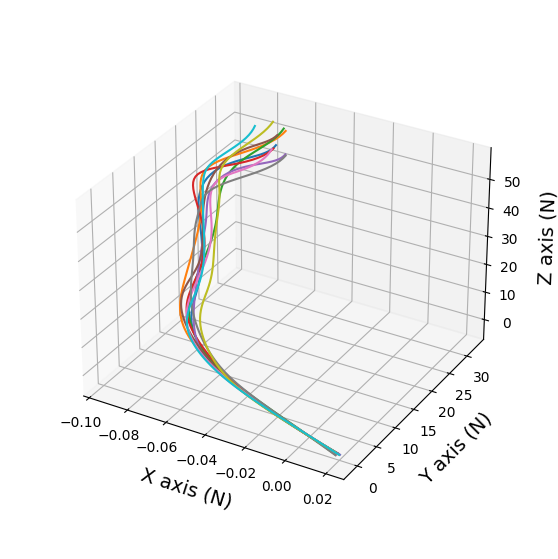

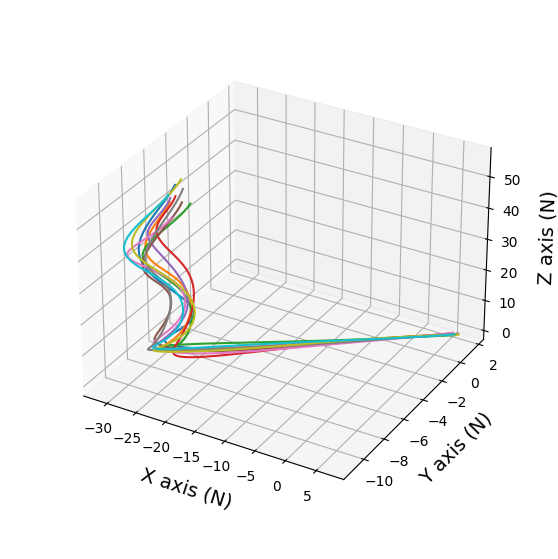

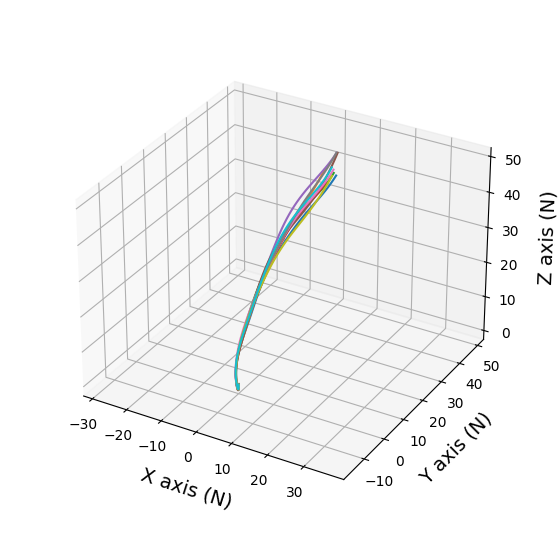

In [21]:
# plot augmented trajectory and torque
# data -- [time, path_num, dof]
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
print(len(torque_loader))
# load all the data in the loader
num_traj = 0
for i in range(len(torque_loader)):
        inter, label = torque_loader.torque[:, i, :], torque_loader.torque_labels[i]

        if label[0] == 1:
            ax.plot(inter[:,0].numpy(), inter[:,1].numpy(), inter[:,2].numpy())
            num_traj += 1
        if num_traj == 10:
            # Customize labels with font size
            ax.set_xlabel('X axis (N)', fontsize=14, labelpad=10)
            ax.set_ylabel('Y axis (N)', fontsize=14, labelpad=10)
            ax.set_zlabel('Z axis (N)', fontsize=14, labelpad=10)  
            ax.set_box_aspect(aspect=None, zoom=0.86)          
            break

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
num_traj = 0
for i in range(len(torque_loader)):
        inter, label = torque_loader.torque[:, i, :], torque_loader.torque_labels[i]
        if label[0] == 2:
            ax.plot(inter[:,0].numpy(), inter[:,1].numpy(), inter[:,2].numpy())
            num_traj += 1
        if num_traj == 10:
            ax.set_xlabel('X axis (N)', fontsize=14, labelpad=10)
            ax.set_ylabel('Y axis (N)', fontsize=14, labelpad=10)
            ax.set_zlabel('Z axis (N)', fontsize=14, labelpad=10) 
            ax.set_box_aspect(aspect=None, zoom=0.86)
            break

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
num_traj = 0
for i in range(len(torque_loader)):
        inter, label = torque_loader.torque[:, i, :], torque_loader.torque_labels[i]
        if label[0] == 3:
            ax.plot(inter[:,0].numpy(), inter[:,1].numpy(), inter[:,2].numpy())
            num_traj += 1
        if num_traj == 10:
            ax.set_xlabel('X axis (N)', fontsize=14, labelpad=10)
            ax.set_ylabel('Y axis (N)', fontsize=14, labelpad=10)
            ax.set_zlabel('Z axis (N)', fontsize=14, labelpad=10) 
            ax.set_box_aspect(aspect=None, zoom=0.86)
            break

plt.axis("equal")
plt.show()